In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [36]:
file_path = "/content/t8.shakespeare.txt"
with open(file_path,'r') as f:
  text = f.readlines()
  f.close()

In [37]:
text = (" ".join(text))[10760:]

In [38]:
text = text.strip()
text = text.replace("\n","")
text = text.replace("\t","")

In [ ]:
text

# **Text analysis**

In [41]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

**Word count and character count**

In [44]:
data = text[:5000]

In [43]:
def get_counts(text):
  word_count = len(text.split())
  char_count = len(text)

  return word_count,char_count

In [46]:
word_count,char_count = get_counts(data)
print("Word count : ",word_count,"\nCharacter count : ",char_count)

Word count :  820 
Character count :  5000


In [47]:
def average_word_length(text):
  words = text.split()
  total_chars = 0
  for word in words:
    total_chars+=len(word)
  return total_chars/len(words)

In [48]:
avg_word_length = average_word_length(data)
print("The average word length is : ", avg_word_length)

The average word length is :  4.5963414634146345


### **Stop words**

In [50]:
def get_stop_words(text):
  text = text.lower()
  stop_words = [x for x in text.split() if x in STOP_WORDS]
  return stop_words, len(stop_words)

In [51]:
stop_words,sw_count = get_stop_words(data)

In [53]:
sw_count

331

### **Get emails and URLS present in text**

In [54]:
import re

def extractEmailsURLs(text):
  emails = re.findall('\S+@\S+', text)
  urls = re.findall('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', text)
  return emails,urls

In [55]:
s = '''Now a days you can learn almost anything by just visiting http://www.google.com. But if you are completely new to computers or internet then first you need to leanr those fundamentals. Next
you can visit my email sahasharad29@gmail.com or a good e-learning site like - https://www.tutorialspoint.com to learn further on a variety of subjects.'''

In [56]:
emails, urls = extractEmailsURLs(s)

In [57]:
emails,urls

(['sahasharad29@gmail.com'],
 ['http://www.google.com.', 'https://www.tutorialspoint.com'])

### **Stopwords removal, lemmatization and preprocessing**

In [58]:
def preprocess(text):
  text_without_stop_words = " ".join([x for x in text.split() if x not in STOP_WORDS])
  
  nlp = spacy.load('en_core_web_sm')
  doc = nlp(text_without_stop_words)
  lemmas = []
  for token in doc:
    lemma = str(token.lemma_)
    if lemma == '-PRON-' or lemma == 'be':
      lemma = token.text
    lemmas.append(lemma)
  text = " ".join(lemmas)

  return text

In [59]:
preprocessed_data = preprocess(data)
preprocessed_data

"1 from fair creature desire increase , that beauty 's rose die , but riper time decease , his tender heir bear memory : but thou contract thine bright eye , Feed'st thy light 's flame self - substantial fuel , make famine abundance lie , thy self thy foe , thy sweet self cruel : Thou art world 's fresh ornament , and herald gaudy spring , within thine bud buriest thy content , and tender churl mak'st waste niggarding : pity world , glutton be , to eat world 's due , grave thee . 2 when winter shall besiege thy brow , and dig deep trench thy beauty 's field , Thy youth 's proud livery gaze now , will tattere weed small worth hold : then ask , thy beauty lie , where treasure thy lusty day ; to thine deep sunken eye , Were all - eat shame , thriftless praise . how praise deserve thy beauty 's use , if thou couldst answer ' this fair child shall sum count , old excuse ' prove beauty succession thine . this new thou art old , and thy blood warm thou feel'st cold . 3 look thy glass tell fac

### **Wordcloud visualization**

In [61]:
def plot_word_cloud(text,width,height):
  wc = WordCloud(width=width,height=height).generate(text)
  plt.imshow(wc)
  plt.axis('off')
  plt.show()

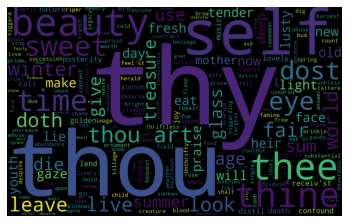

In [64]:
plot_word_cloud(preprocessed_data,1600,1000)

### **Named entity recognition**

In [67]:
class NamedEntity:
  def __init__(self,text,label,explanation):
    self.text = text
    self.label = label
    self.explanation = explanation

def get_named_entities(text):
  nlp = spacy.load('en_core_web_sm')
  doc = nlp(text)

  named_entities = []
  for ent in doc.ents:
    entity = NamedEntity(ent.text,ent.label_,str(spacy.explain(ent.label_)))
    named_entities.append(entity)
  return named_entities

In [79]:
ner_data = '''Several intended recipients, including musician Hemanta Kumar Mukherjee, sitar player Vilayat Khan,[7] academic and author Mamoni Raisom Goswami,[8] journalist Kanak Sen Deka[9] and noted Bollywood screenwriter Salim Khan, have declined the Padma Shri for various reasons.[10] Some intended recipients, such as environmental activist Sunderlal Bahuguna[11] and English billiards champion Michael Ferreira,[9] have refused the honour but have subsequently accepted a more prestigious one such as the Padma Bhushan or Padma Vibhushan. Other individuals, such as film-maker Aribam Syam Sharma,[12] author Phanishwar Nath 'Renu'
,[13] Punjabi author Dalip Kaur Tiwana[14] and noted poet Jayanta Mahapatra,[15] have returned the honour after initially accepting it.
In 2022, renowned Bengali singer "Gitashri" Sandhya Mukhopadhyay, 90 turned down her offer for the Padma Shri award on the eve of the 73rd Republic Day of India. As per media reports, the veteran singer turned the offer since she believes that her career spanning eight decades deserved a higher award than the Padma Shri. "Padma Shri is more deserving for a junior artiste", her daughter said.[16] Based on her refusal, her name was not included in the Padma awardees list for 2022.'''

named_entities = get_named_entities(ner_data)
for entity in named_entities:
  print(entity.text," - ",entity.label," - ",entity.explanation)

Kumar Mukherjee  -  PERSON  -  People, including fictional
Vilayat Khan,[7  -  PERSON  -  People, including fictional
Mamoni Raisom  -  PERSON  -  People, including fictional
Kanak Sen Deka[9  -  PERSON  -  People, including fictional
Bollywood  -  PERSON  -  People, including fictional
Salim Khan  -  PERSON  -  People, including fictional
the Padma Shri  -  LAW  -  Named documents made into laws.
Sunderlal  -  GPE  -  Countries, cities, states
English  -  LANGUAGE  -  Any named language
Michael Ferreira,[9  -  PERSON  -  People, including fictional
one  -  CARDINAL  -  Numerals that do not fall under another type
Padma Vibhushan  -  GPE  -  Countries, cities, states
Aribam Syam  -  ORG  -  Companies, agencies, institutions, etc.
Phanishwar Nath 'Renu'  -  PERSON  -  People, including fictional
13  -  CARDINAL  -  Numerals that do not fall under another type
Dalip Kaur Tiwana[14  -  ORG  -  Companies, agencies, institutions, etc.
Jayanta Mahapatra,[15  -  PERSON  -  People, including f

In [80]:
from spacy import displacy

def render_ner(text):
  nlp = spacy.load('en_core_web_sm')
  doc = nlp(text)

  displacy.render(doc,style='ent')
  plt.show()

In [81]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(ner_data)

displacy.render(doc,style='ent',jupyter=True)

### **POS tagging**

In [87]:
def pos(text):
  nlp = spacy.load("en_core_web_sm")
  doc = nlp(text)

  for token in doc:
      print(token.text," - ", token.pos_," - ", token.tag_," - ", token.dep_," - ",token.shape_)

In [88]:
pos("Hey there! My name is Sharad.")

Hey  -  INTJ  -  UH  -  intj  -  Xxx
there  -  ADV  -  RB  -  ROOT  -  xxxx
!  -  PUNCT  -  .  -  punct  -  !
My  -  PRON  -  PRP$  -  poss  -  Xx
name  -  NOUN  -  NN  -  nsubj  -  xxxx
is  -  AUX  -  VBZ  -  ROOT  -  xx
Sharad  -  PROPN  -  NNP  -  attr  -  Xxxxx
.  -  PUNCT  -  .  -  punct  -  .


### **Named Entity recognition using BERT pretrained model**

In [89]:
! pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 5.0 MB/s 
     |████████████████████████████████| 101 kB 9.2 MB/s 
     |████████████████████████████████| 6.6 MB 34.8 MB/s 
     |████████████████████████████████| 596 kB 65.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


**Loading pretrained model from Hugging Face**

In [91]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

In [102]:
nlp = pipeline("ner", model=model, tokenizer=tokenizer)

ner_results = nlp(preprocess(ner_data))
print(ner_results)

[{'entity': 'B-PER', 'score': 0.99969876, 'index': 7, 'word': 'He', 'start': 44, 'end': 46}, {'entity': 'B-PER', 'score': 0.52190495, 'index': 8, 'word': '##man', 'start': 46, 'end': 49}, {'entity': 'B-PER', 'score': 0.9405298, 'index': 9, 'word': '##ta', 'start': 49, 'end': 51}, {'entity': 'I-PER', 'score': 0.999223, 'index': 10, 'word': 'Kumar', 'start': 52, 'end': 57}, {'entity': 'I-PER', 'score': 0.99971884, 'index': 11, 'word': 'Mu', 'start': 58, 'end': 60}, {'entity': 'I-PER', 'score': 0.97929674, 'index': 12, 'word': '##kh', 'start': 60, 'end': 62}, {'entity': 'I-PER', 'score': 0.9965107, 'index': 13, 'word': '##erjee', 'start': 62, 'end': 67}, {'entity': 'B-PER', 'score': 0.99967504, 'index': 18, 'word': 'V', 'start': 83, 'end': 84}, {'entity': 'B-PER', 'score': 0.99889565, 'index': 19, 'word': '##ila', 'start': 84, 'end': 87}, {'entity': 'I-PER', 'score': 0.98389155, 'index': 20, 'word': '##ya', 'start': 87, 'end': 89}, {'entity': 'B-PER', 'score': 0.9105178, 'index': 21, 'wor

In [103]:
names = []
tags = []
for ent in ner_results:
  names.append(ent['word'])
  tags.append(ent['entity'])

In [104]:
names = pd.Series(names)
tags = pd.Series(tags)

In [105]:
dict = {'Name' : names, 'Tag' : tags}
named_entities_df = pd.DataFrame(data=dict)

In [106]:
named_entities_df.head(50)

,Name,Tag
0,He,B-PER
1,##man,B-PER
2,##ta,B-PER
3,Kumar,I-PER
4,Mu,I-PER
5,##kh,I-PER
6,##erjee,I-PER
7,V,B-PER
8,##ila,B-PER
9,##ya,I-PER


In [99]:
names

0         He
1      ##man
2       ##ta
3      Kumar
4         Mu
       ...  
97      Shri
98     Padma
99      Shri
100    Padma
101    award
Length: 102, dtype: object